### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [11]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Date'] = df['Date/Time'].dt.date
df['Time'] = df['Date/Time'].dt.time
# Group by date and count the number of pickups
cnt_per_date = df.groupby('Date')['Base'].count()
# Find the date with the highest number of pickups
date_with_most_pickups = cnt_per_date.idxmax()
print("The date with most Pickups:", date_with_most_pickups)



The date with most Pickups: 2014-08-07


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [12]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
no_of_pickups = cnt_per_date.reset_index().set_index('Date')
# Get the count of pickups on the highest date
most_pickups = no_of_pickups.sort_values('Base', ascending=False).head(1)
print("Most no of pickups on Date:",most_pickups)

# Get the count of pickups on the highest date`




Most no of pickups on Date:              Base
Date             
2014-08-07  32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [13]:
# Count the number of unique TLC base companies
unique_TLC_company=df['Base'].nunique()
print(unique_TLC_company)



5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [14]:



# Group by TLC base company and count the number of pickups


# Find the TLC base company with the highest number of pickups
no_of_pickup=df.groupby('Base')['Lat'].count()
most_no_of_pickup= no_of_pickup.idxmax()
print("highest number of pickups:",most_no_of_pickup)


highest number of pickups: B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [15]:
# Group by TLC base company and count the number of pickups
pickup_counts = df.groupby('Base')['Lat'].count()
print(pickup_counts)



Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
Name: Lat, dtype: int64






#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [16]:
# Extract the hour from the 'Date/Time' column
df['Hour']=df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_counts=df.groupby('Hour').size()
hour_with_highest_pickups = pickup_counts.idxmax()
am_pm = 'AM' if hour_with_highest_pickups < 12 else 'PM'
if hour_with_highest_pickups > 12:
    hour_with_highest_pickups -= 12
print("Hour with the highest number of pickups:", hour_with_highest_pickups, am_pm)


Hour with the highest number of pickups: 5 PM


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

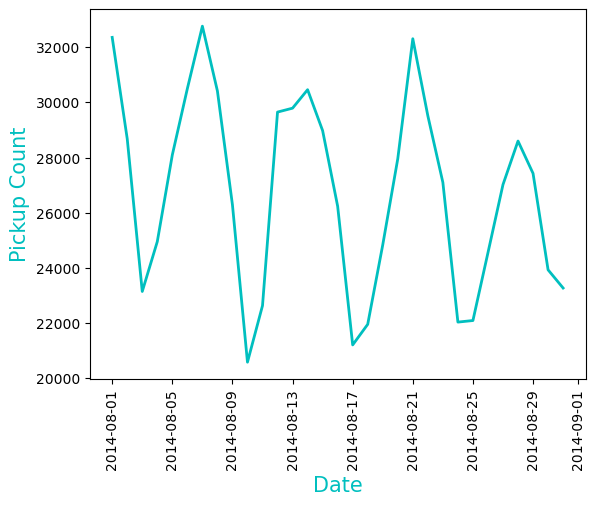

In [19]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_count_by_date = df.groupby('Date')['Lat'].count()

# Create a line plot to visualize the number of pickups over time
plt.plot(pickup_count_by_date.index, pickup_count_by_date.values,color= 'c' ,linewidth = 2)

plt.xlabel("Date",fontsize = 15,color = 'c')
plt.ylabel("Pickup Count",fontsize = 15,color = 'c')
#plt.title("Uber Pickups Over Time",fontsize = 15,color = 'c')
plt.xticks(rotation=90)
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

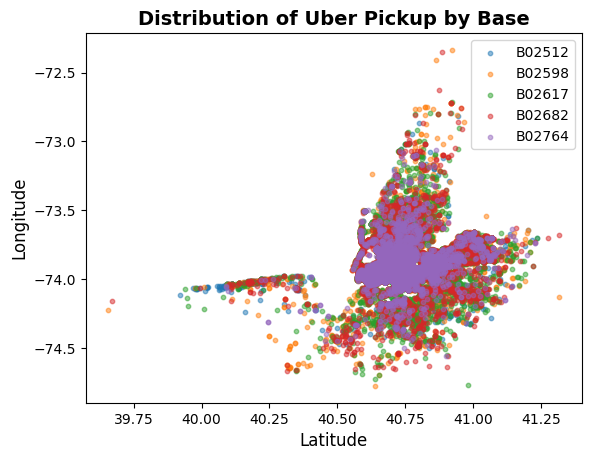

In [10]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
grouped_data = df.groupby('Base')

# create a scatter plot for each group
for group_name, group_data in grouped_data:
    plt.scatter(group_data['Lat'], group_data['Lon'], label=group_name, s=10, alpha=0.5)

plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.title('Distribution of Uber Pickup by Base', fontsize=14, fontweight='bold')
plt.legend()

plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

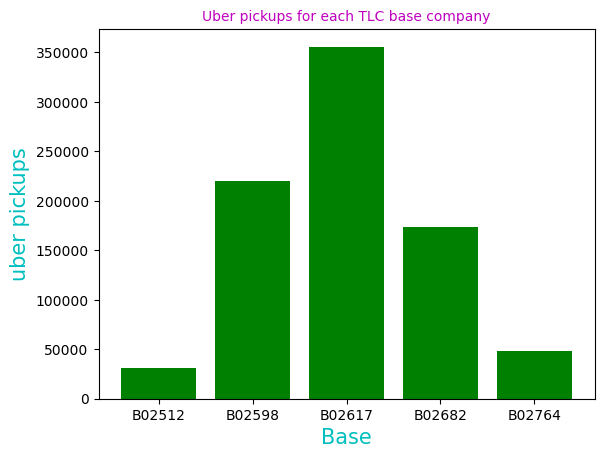

In [11]:
# Create a bar chart to compare the number of Uber pickups for each TLC base com
tlc_with_pickups=df.groupby('Base')['Lat'].count()
plt.bar(tlc_with_pickups.index,tlc_with_pickups.values,color='g')
plt.xlabel('Base',fontsize=15,color='c')
plt.ylabel('uber pickups',fontsize=15,color='c')
plt.title('Uber pickups for each TLC base company',fontsize=10,color='m')
plt.show()



#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

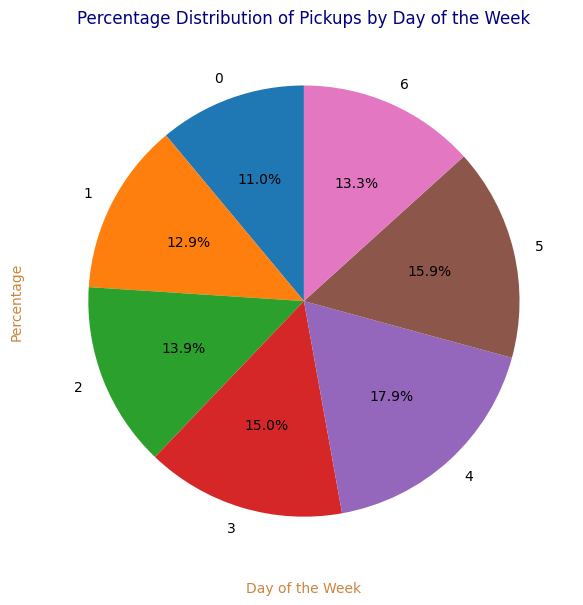

In [12]:
# Group by day of the week and count the number of pickups
df['week'] = df['Date/Time'].dt.dayofweek
pickup_counts = df.groupby('week').size()
pickup_counts = df.groupby('week').size()
percentage_distribution = pickup_counts / pickup_counts.sum() * 100
plt.figure(figsize=(10, 7))  
plt.pie(percentage_distribution, labels=pickup_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Percentage Distribution of Pickups by Day of the Week', c='navy')
plt.xlabel('Day of the Week', c='peru')
plt.ylabel('Percentage',c='peru')

plt.show()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
